In [1]:
import pandas as pd
import numpy as np 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('dataset_1.csv')
print(df.head())

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target
print(np.mean(X['x1']), np.std(X['x1']))
print(np.mean(X['x2']), np.std(X['x2']))

         x1        x2  y
0  1.764052  0.400157 -1
1  0.978738  2.240893 -1
2  1.867558 -0.977278  1
3  0.950088 -0.151357  1
4 -0.103219  0.410599  1
-0.08973886944750001 0.988492329010428
-0.05732415314500001 1.0040673221061431


In [4]:
# Training a linear kernel, Q1b

# Initialize variables for best hyperparameters and best AUC 
best_linear_params = []
best_linear_aucs = []
# Perform 10 fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kk = 0
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    best_C = None
    best_auc = 0.0
    # Perform grid search for C hyperparameter
    for C in np.arange(0.1, 100, 0.1): 
    #for C in [0.1, 1, 10, 100]:
        svm = SVC(kernel='linear', C=C)
        svm.fit(X_train, y_train)
        #auc_scores = cross_val_score(svm, X_train, y_train, cv=10, scoring='roc_auc')
        #avg_auc = auc_scores.mean()
        next_auc = roc_auc_score(y_train, svm.predict(X_train))
        if next_auc > best_auc:
            best_auc = next_auc
            best_C = C
    best_linear_params.append(best_C)
    best_linear_aucs.append(best_auc)
    print("Fold %d Best Linear SVM C: %s" % (kk,str(best_C)))
    print("Fold %d Cross Validation AUC %s" % (kk, best_auc))
    kk+=1
meanbest_linear_param = np.mean(best_linear_params)
print('meanbest C %f' % (meanbest_linear_param))
    

Fold 0 Best Linear SVM C: 0.1
Fold 0 Cross Validation AUC 0.5
Fold 1 Best Linear SVM C: 0.30000000000000004
Fold 1 Cross Validation AUC 0.6459752321981423
Fold 2 Best Linear SVM C: 1.6
Fold 2 Cross Validation AUC 0.6647173489278753
Fold 3 Best Linear SVM C: 0.1
Fold 3 Cross Validation AUC 0.5
Fold 4 Best Linear SVM C: 0.1
Fold 4 Cross Validation AUC 0.5
Fold 5 Best Linear SVM C: 0.2
Fold 5 Cross Validation AUC 0.6328125000000001
Fold 6 Best Linear SVM C: 0.1
Fold 6 Cross Validation AUC 0.6700083542188805
Fold 7 Best Linear SVM C: 0.2
Fold 7 Cross Validation AUC 0.675268551673046
Fold 8 Best Linear SVM C: 0.2
Fold 8 Cross Validation AUC 0.6450849345586187
Fold 9 Best Linear SVM C: 0.5
Fold 9 Cross Validation AUC 0.6723876204343382
meanbest C 0.340000


In [ ]:
print( np.logspace(-9, 3, 13))

In [5]:
# Kernel = poly, Q1c

# Initialize variables for best hyperparameters and best AUC
best_poly_params = []
best_poly_aucs = []
kk=0
# Perform 10-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    best_C = None
    best_auc = 0.0
    # Perform grid search for C hyperparameter
    for C in np.arange(0.1, 100, 0.1):
        svm = SVC(kernel='poly', degree=2, C=C)
        svm.fit(X_train, y_train)
        next_auc = roc_auc_score(y_train, svm.predict(X_train))
        if next_auc > best_auc:
            best_auc = next_auc
            best_C = C
    best_poly_params.append(best_C)
    best_linear_aucs.append(best_auc)
    print("Fold %d Best Poly-2 SVM C: %s" % (kk,str(best_C)))
    print("Fold %d Cross Validation AUC %s" % (kk, best_auc))
    kk+=1
meanbest_poly_param = np.mean(best_poly_params)
print('meanbest C %f' % (meanbest_poly_param))

Fold 0 Best Poly-2 SVM C: 13.700000000000001
Fold 0 Cross Validation AUC 1.0
Fold 1 Best Poly-2 SVM C: 12.8
Fold 1 Cross Validation AUC 1.0
Fold 2 Best Poly-2 SVM C: 12.9
Fold 2 Cross Validation AUC 1.0
Fold 3 Best Poly-2 SVM C: 21.500000000000004
Fold 3 Cross Validation AUC 1.0
Fold 4 Best Poly-2 SVM C: 21.1
Fold 4 Cross Validation AUC 1.0
Fold 5 Best Poly-2 SVM C: 12.5
Fold 5 Cross Validation AUC 1.0
Fold 6 Best Poly-2 SVM C: 14.3
Fold 6 Cross Validation AUC 1.0
Fold 7 Best Poly-2 SVM C: 21.6
Fold 7 Cross Validation AUC 1.0
Fold 8 Best Poly-2 SVM C: 45.800000000000004
Fold 8 Cross Validation AUC 1.0
Fold 9 Best Poly-2 SVM C: 12.3
Fold 9 Cross Validation AUC 1.0
meanbest C 18.850000


In [6]:
# Kernel = rbf, #Q1d
best_rbf_C = []
best_rbf_gamma = []
best_rbf_aucs = []
kk=0
# Initialize variables for best hyperparameters and best AUC
# Perform 10-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    best_C = None
    best_gamma = None
    best_auc = 0.0
    # Perform grid search for C hyperparameter
    for C in np.arange(0.1, 100, 0.1):
        #for gamma in [0.1, 1, 10, 100]:
        for gamma in np.logspace(-9, 3, 13):
            svm = SVC(kernel='rbf', C=C, gamma=gamma)
            svm.fit(X_train, y_train)
            next_auc = roc_auc_score(y_train, svm.predict(X_train))
            if next_auc > best_auc:
                best_auc = next_auc
                best_C = C
                best_gamma = gamma
    best_rbf_C.append(best_C)
    best_rbf_gamma.append(best_gamma)
    best_rbf_aucs.append(best_auc)
    print("Fold %d Best RBF SVM C: %f gamma %f" % (kk,best_C, best_gamma))
    print("Fold %d Cross Validation AUC %s" % (kk, best_auc))
    kk+=1
meanbest_rbf_C = np.mean(best_rbf_C)
meanbest_rbf_gamma = np.mean(best_rbf_gamma)
print('meanbest C %f gamma %f' % (meanbest_rbf_C, meanbest_rbf_gamma))


Fold 0 Best RBF SVM C: 0.600000 gamma 1000.000000
Fold 0 Cross Validation AUC 1.0
Fold 1 Best RBF SVM C: 0.600000 gamma 1000.000000
Fold 1 Cross Validation AUC 1.0
Fold 2 Best RBF SVM C: 0.500000 gamma 100.000000
Fold 2 Cross Validation AUC 1.0
Fold 3 Best RBF SVM C: 0.600000 gamma 1000.000000
Fold 3 Cross Validation AUC 1.0
Fold 4 Best RBF SVM C: 0.500000 gamma 100.000000
Fold 4 Cross Validation AUC 1.0
Fold 5 Best RBF SVM C: 0.600000 gamma 1000.000000
Fold 5 Cross Validation AUC 1.0
Fold 6 Best RBF SVM C: 0.600000 gamma 1000.000000
Fold 6 Cross Validation AUC 1.0
Fold 7 Best RBF SVM C: 0.400000 gamma 100.000000
Fold 7 Cross Validation AUC 1.0
Fold 8 Best RBF SVM C: 0.200000 gamma 10.000000
Fold 8 Cross Validation AUC 1.0
Fold 9 Best RBF SVM C: 0.600000 gamma 1000.000000
Fold 9 Cross Validation AUC 1.0
meanbest C 0.520000 gamma 631.000000


In [6]:
#Q1e : 
#  How stable are the hyperparameter estimates and what causes the stability /
#variance for this dataset?


# The hyperparameters are not very stable in this dataset. The instability could be due do random initialization, and a generally 
# low C parameter.








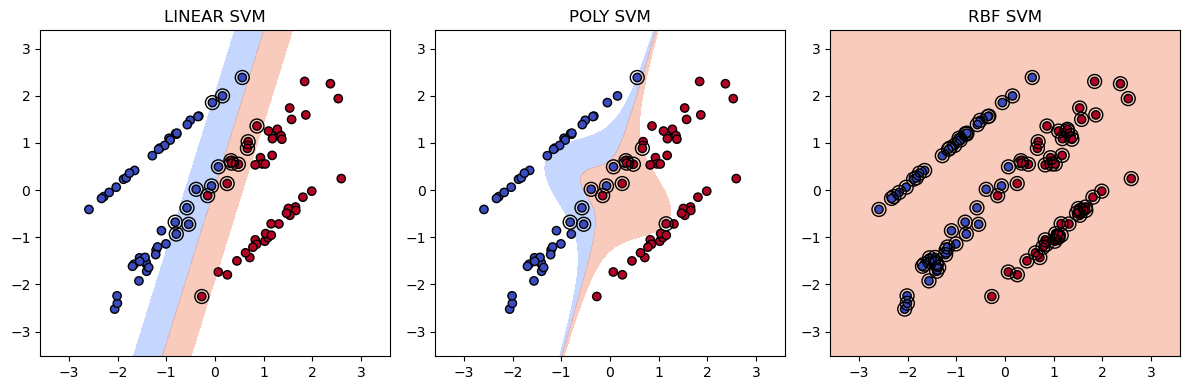

In [7]:

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Initialize kernels and their respective best hyperparameters
kernels = ['linear', 'poly', 'rbf']
best_hyperparameters = [
    {'C': meanbest_linear_param},
    {'C': meanbest_poly_param},
    {'C': meanbest_rbf_C, 'gamma': meanbest_rbf_gamma}
]

# Train SVMs and plot decision boundaries for each kernel
plt.figure(figsize=(12, 4))
for i, kernel in enumerate(kernels):
    best_params = best_hyperparameters[i]
    svm = SVC(kernel=kernel, **best_params)
    svm.fit(X, y)

    # Create a mesh to plot decision boundaries
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]

    # Predictions for decision boundaries
    Z = svm.decision_function(mesh_points).reshape(xx.shape)

    # Plot decision boundaries and support vectors
    plt.subplot(1, 3, i + 1)
    plt.title(f'{kernel.upper()} SVM')
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.tight_layout()
plt.show()







In [7]:
# Part 2

data = pd.read_csv("dataset_blobs.csv")
X = data.iloc[:, :2]  # Use only the first two columns as features

In [8]:
data.shape
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5400 non-null   float64
 1   x2      5400 non-null   float64
 2   y       5400 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 126.7 KB


,x1,x2,y
count,5400.000000,5400.000000,5400.000000
mean,2.357712,2.550932,2.500000
std,3.277383,3.929955,1.707983
min,-4.443684,-4.144974,0.000000
25%,0.253544,-0.925862,1.000000
50%,1.953260,1.489572,2.500000
75%,4.337222,5.870821,4.000000
max,9.896949,11.578141,5.000000


In [20]:
class KMeans:
    """
    KMeans clustering algorithm implementation.
    
    Parameters:
        n_clusters (int): Number of clusters to form.
    
    Attributes:
        n_clusters (int): Number of clusters.
        centers (ndarray): Cluster centers.
        inertia (float): Total within-cluster sum of squares.
    """
    
    def __init__(self, n_clusters):
        """
        Initialize KMeans instance.
        
        Args:
            n_clusters (int): Number of clusters to form.
        """
        self.n_clusters = n_clusters
        self.centers = None
        self.inertia = None
    
    def fit(self, X, max_iters=100):
        """
        Fit KMeans clustering to the data.
        
        Args:
        X (ndarray): Input data matrix (N x M), where N is the number of data instances
        and M is the number of features.
        max_iters (int, optional): Maximum number of iterations for convergence.
        Default is 100.
        """
        n_samples, n_features = X.shape
        self.centers = X[np.random.choice(n_samples, self.n_clusters, replace=False)]

        for _ in range(max_iters):
            distances = np.linalg.norm(X.reshape(n_samples, 1, n_features) - self.centers, axis=2)
            labels = np.argmin(distances, axis=1)
            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            self.inertia = np.sum(np.min(distances, axis=1))
            
            if np.allclose(new_centers, self.centers):
                break
                
            self.centers = new_centers
    
    def predict(self, X):
        """
        Predict cluster labels for new data.
        
        Args:
            X (ndarray): New data matrix (N' x M), where N' is the number of new instances
                         and M is the number of features.
        
        Returns:
            ndarray: Cluster labels for each new instance.
        """
        distances = np.linalg.norm(X.reshape(X.shape[0], 1, -1) - self.centers, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels





In [21]:
# Create an instance of KMeans
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model
kmeans.fit(X.values)

# Predict cluster labels for the data
cluster_labels = kmeans.predict(X.values)

Inertia Values: [14211.31565717472, 10770.064352488846, 8032.031456350531, 5976.797127418339, 4665.8975595342745, 4501.033514414645, 4346.208781317942, 4259.949419137767, 4145.989029539136]


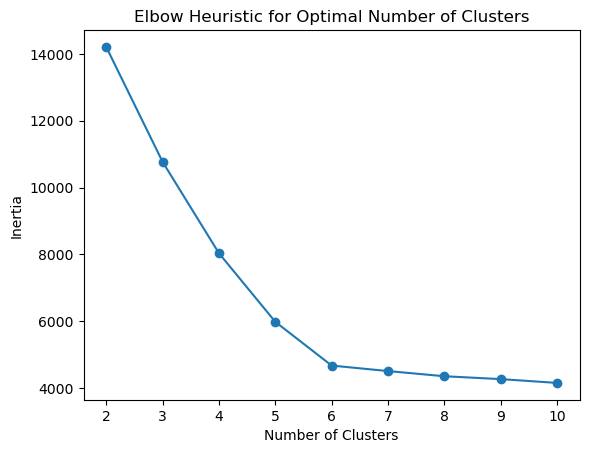

In [22]:
# Vary the number of clusters from 2 to 10
n_clusters_range = range(2, 11)
inertia_values = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X.values)
    inertia_values.append(kmeans.inertia)

# Print inertia_values for debugging
print("Inertia Values:", inertia_values)

# Plot the elbow curve
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Heuristic for Optimal Number of Clusters')
plt.show()

In [ ]:
# The optimal number of Clusters is 7 based on the elbow heuristic.